In [2]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import random
from scipy import signal

In [3]:
import tensorflow as tf

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [4]:
# 1. Drop unneeded columns in frames data

# Returns the list of used columns (dropping lower joints, useless features...)
def computeUsedColumns() :
    # header computed on one frame row (skipping rows 2-6) with following replace regex
    # ([A-z]+)\s*\w+\s+[\-0-9\.]+\s+[\-0-9\.]+\s+[\-0-9\.]+\s+[\-0-9\.]+\s+[\-0-9\.]+\s+[\-0-9\.]+\s+[\-0-9\.]+\s+
    # $1\t$1Status\t$1LocX\t$1LocY\t$1LocZ\t$1OrW\t$1OrX\t$1OrY\t$1OrZ\t
    header = ["Index","Time","SkeletonId","HandLeftConfidence","HandLeftState","HandRightConfidence","HandRightState","SpineBase","SpineBaseStatus","SpineBaseLocX","SpineBaseLocY","SpineBaseLocZ","SpineBaseOrW","SpineBaseOrX","SpineBaseOrY","SpineBaseOrZ","SpineMid","SpineMidStatus","SpineMidLocX","SpineMidLocY","SpineMidLocZ","SpineMidOrW","SpineMidOrX","SpineMidOrY","SpineMidOrZ","Neck","NeckStatus","NeckLocX","NeckLocY","NeckLocZ","NeckOrW","NeckOrX","NeckOrY","NeckOrZ","Head","HeadStatus","HeadLocX","HeadLocY","HeadLocZ","HeadOrW","HeadOrX","HeadOrY","HeadOrZ","ShoulderLeft","ShoulderLeftStatus","ShoulderLeftLocX","ShoulderLeftLocY","ShoulderLeftLocZ","ShoulderLeftOrW","ShoulderLeftOrX","ShoulderLeftOrY","ShoulderLeftOrZ","ElbowLeft","ElbowLeftStatus","ElbowLeftLocX","ElbowLeftLocY","ElbowLeftLocZ","ElbowLeftOrW","ElbowLeftOrX","ElbowLeftOrY","ElbowLeftOrZ","WristLeft","WristLeftStatus","WristLeftLocX","WristLeftLocY","WristLeftLocZ","WristLeftOrW","WristLeftOrX","WristLeftOrY","WristLeftOrZ","HandLeft","HandLeftStatus","HandLeftLocX","HandLeftLocY","HandLeftLocZ","HandLeftOrW","HandLeftOrX","HandLeftOrY","HandLeftOrZ","ShoulderRight","ShoulderRightStatus","ShoulderRightLocX","ShoulderRightLocY","ShoulderRightLocZ","ShoulderRightOrW","ShoulderRightOrX","ShoulderRightOrY","ShoulderRightOrZ","ElbowRight","ElbowRightStatus","ElbowRightLocX","ElbowRightLocY","ElbowRightLocZ","ElbowRightOrW","ElbowRightOrX","ElbowRightOrY","ElbowRightOrZ","WristRight","WristRightStatus","WristRightLocX","WristRightLocY","WristRightLocZ","WristRightOrW","WristRightOrX","WristRightOrY","WristRightOrZ","HandRight","HandRightStatus","HandRightLocX","HandRightLocY","HandRightLocZ","HandRightOrW","HandRightOrX","HandRightOrY","HandRightOrZ","HipLeft","HipLeftStatus","HipLeftLocX","HipLeftLocY","HipLeftLocZ","HipLeftOrW","HipLeftOrX","HipLeftOrY","HipLeftOrZ","KneeLeft","KneeLeftStatus","KneeLeftLocX","KneeLeftLocY","KneeLeftLocZ","KneeLeftOrW","KneeLeftOrX","KneeLeftOrY","KneeLeftOrZ","AnkleLeft","AnkleLeftStatus","AnkleLeftLocX","AnkleLeftLocY","AnkleLeftLocZ","AnkleLeftOrW","AnkleLeftOrX","AnkleLeftOrY","AnkleLeftOrZ","FootLeft","FootLeftStatus","FootLeftLocX","FootLeftLocY","FootLeftLocZ","FootLeftOrW","FootLeftOrX","FootLeftOrY","FootLeftOrZ","HipRight","HipRightStatus","HipRightLocX","HipRightLocY","HipRightLocZ","HipRightOrW","HipRightOrX","HipRightOrY","HipRightOrZ","KneeRight","KneeRightStatus","KneeRightLocX","KneeRightLocY","KneeRightLocZ","KneeRightOrW","KneeRightOrX","KneeRightOrY","KneeRightOrZ","AnkleRight","AnkleRightStatus","AnkleRightLocX","AnkleRightLocY","AnkleRightLocZ","AnkleRightOrW","AnkleRightOrX","AnkleRightOrY","AnkleRightOrZ","FootRight","FootRightStatus","FootRightLocX","FootRightLocY","FootRightLocZ","FootRightOrW","FootRightOrX","FootRightOrY","FootRightOrZ","SpineShoulder","SpineShoulderStatus","SpineShoulderLocX","SpineShoulderLocY","SpineShoulderLocZ","SpineShoulderOrW","SpineShoulderOrX","SpineShoulderOrY","SpineShoulderOrZ","HandTipLeft","HandTipLeftStatus","HandTipLeftLocX","HandTipLeftLocY","HandTipLeftLocZ","HandTipLeftOrW","HandTipLeftOrX","HandTipLeftOrY","HandTipLeftOrZ","ThumbLeft","ThumbLeftStatus","ThumbLeftLocX","ThumbLeftLocY","ThumbLeftLocZ","ThumbLeftOrW","ThumbLeftOrX","ThumbLeftOrY","ThumbLeftOrZ","HandTipRight","HandTipRightStatus","HandTipRightLocX","HandTipRightLocY","HandTipRightLocZ","HandTipRightOrW","HandTipRightOrX","HandTipRightOrY","HandTipRightOrZ","ThumbRight","ThumbRightStatus","ThumbRightLocX","ThumbRightLocY","ThumbRightLocZ","ThumbRightOrW","ThumbRightOrX","ThumbRightOrY","ThumbRightOrZ"]
    cols = dict()
    for i in range(len(header)) :
        cols[i] = header[i]

    # confidence
    for i in range(2,7) :
        del cols[i]

    # joint name
    for i in range(7,224,9) :
        del cols[i]

    # 8 lower joints
    for i in [116, 125, 134, 143, 152, 161, 170, 179] :
        for j in range(8) :
            del cols[i+j]

    # always null orientations
    for i in [39, 201, 210, 219, 228] :
        for j in range(4) :
            del cols[i+j]

    # remove tracking status features
    for i in [8, 17, 26, 35, 44, 53, 62, 71, 80, 89, 98, 107, 188, 197, 206, 215, 224] :
        del cols[i]

    return cols

# Loads a skeleton dataframe from 'filepath' CSV, keeping only 'cols' columns
def loadEggnogSkeleton(filepath, cols):
    filepath = "datasets/eggnog.original/" + filepath
    dataframe = pd.read_csv(filepath, header=None, skiprows=[0], usecols=list(cols.keys()), names=list(cols.values()))
    return dataframe

In [5]:
# 2. Train & test set construction

# hyperparameters
# moveDetectionDuraction (ns) : window of time around which the frames are considered as a start/end frame [-moveDetectionDuration,moveDetectionDuration]

# Loads frames corresponding timestamps from 'filepath' CSV
def loadTimestamps(filepath):
    filepath = "datasets/eggnog.original/" + filepath
    # print(filepath)
    dataframe = pd.read_csv(filepath)
    return dataframe

def createFrameTest(eFrames, timestamps, moveDetectionDuration) :
    def getFrameLabels(frame) :
        isSF, isEF = False, False
        timestampsLen = len(timestamps)
        for f in eFrames :
            if f < timestampsLen and abs(frame[1] - timestamps[f][1]) < moveDetectionDuration :
                isSF = True
                #print(timestamps[f][1] - moveDetectionDuration, "<", frame[1], "<", timestamps[f][1] + moveDetectionDuration, "for frame",f)
                break
#        for f in eFrames :
#            if abs(frame[1] - f*1000000000/30) < moveDetectionDuration :
#                isEF = True
#                print(frame[1], "ef frame", f)
#                break
        return isSF
    return getFrameLabels
    


In [6]:
# 3. Dataset creation & labels parsing

# Creates and returns the dataset as an array of [frames as numpy array, labels as list of booleans] loaded from the "Labels.tsv"
#    by matching each movement end label found with its corresponding frames (within a time interval) marking it as "True"
def createDataset(columns, moveDetectionDuration = 333333) :
    labels = pd.read_csv("datasets/eggnog/Labels.tsv", sep='\t')
    eFrames = list()
    data = dict()
    lastFile = ""
    n=0
    ns, nf = 0, 0
    diag = True
    for i in range(len(labels)) :
        l = labels.loc[i]
        n+=1
        #if n > 10000 : break
        # else : print(str(n)+"/400")
        if lastFile != "" and lastFile != l["File Name"] :
            lastFile = lastFile.replace("\\", "/")
            eggSkel = loadEggnogSkeleton(lastFile+"_Skeleton.txt", columns)
            timestampsOk = False
            try:
                timestamps = loadTimestamps(lastFile+"_RGB.frames")
                timestampsOk = True
            except FileNotFoundError:
                try:
                    timestamps = loadTimestamps(lastFile+"_Video.frames")
                    timestampsOk = True
                except FileNotFoundError:
                    print(lastFile+ " ignored, no frame file found")
                    nf +=1
            if(timestampsOk) :
                frames = eggSkel.drop(["Index", "Time"], 1)
                labs = list(map(createFrameTest(eFrames, timestamps.values, moveDetectionDuration), eggSkel.values))
                data[lastFile] = [frames, labs]
                if diag : 
                    a = np.array(labs)
                    movFramesCount = np.sum(a == True)
                    print(lastFile+" well processed: "+str(len(eFrames))+" labs => "+ str(movFramesCount)+"/"+str(len(labs))+" frames marked.")
                else :
                    print(lastFile+" well processed !")
                ns += 1
                if (ns>50):
                    return data
            #else :
            #    print(lastFile+" couldnt be parsed: timestamps == False")
            eFrames = list()
        lastFile = l["File Name"]
        eFrames.append(l["End Frame"])
    print(str(ns) +" files loaded for "+str(nf)+" fails (frames file not found), itered on "+str(n)+" total labels")
    return data

In [7]:
# 4. Smoothing datas with savgol filter

def smoothDataset(data, windowLength = 13, order = 1) :
    for i in data :
        print("Smoothing "+str(i)+"..")
        for s in data[i][0] :
            data[i][0][s] = signal.savgol_filter(data[i][0][s], windowLength, order)
    print("Smoothing finished !")
    return data

In [8]:
#5. Create batch for lstm training

def multivariate_data(dataset, target, start_index, end_index, history_size,
                      target_size, step, single_step=False):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i, step)
    data.append(dataset[indices])

    if single_step:
      labels.append(target[i+target_size])
    else:
      labels.append(target[i:i+target_size])

  return np.array(data), np.array(labels)

In [9]:
#6. Create Dataset, return x_train_single, y_train_single, x_val_single, y_val_single

def createSets(data, ratio, maxFilesNumber):
    #Parameters
    past_history = 15
    future_target = 0
    STEP = 1
    TRAIN_SPLIT = None
    BUFFER_SIZE = 10000
    BATCH_SIZE = 256
    
    maxIndexFile=maxFilesNumber
    #maxIndexFile=len(data)
    valStart=int(ratio*maxIndexFile)
    
    
    #Training set
    print("Creating training set with "+str(valStart)+" files")
    x_train_single, y_train_single = [[[]]], [[[]]]
    i = 0
    for file in data :
        i += 1
        if i > valStart : break # reducing dataset size for first tries
        print(str(i) + ". Processing "+file+"..")
        X = data[file][0].values
        Y = data[file][1]
        x_train_step, y_train_step = multivariate_data(X, Y, 0,
                                                           TRAIN_SPLIT, past_history,
                                                           future_target, STEP,
                                                           single_step=True)    
        x_train_single += x_train_step.tolist()
        y_train_single += y_train_step.tolist()
    
    x_train_single, y_train_single = x_train_single[1:], y_train_single[1:]
    
    #Validation set
    print("Creating validation set with "+str(maxIndexFile-valStart)+" files")
    x_val_single, y_val_single = [[[]]], [[[]]] 
    i=valStart
    for file in data :
        i += 1
        if i > maxIndexFile : break # reducing dataset size for first tries
        print(str(i) + ". Processing "+file+"..")
        X = data[file][0].values
        Y = data[file][1]
        x_val_step, y_val_step = multivariate_data(X, Y,
                                                   0, TRAIN_SPLIT, past_history,
                                                   future_target, STEP,
                                                   single_step=True)    

        x_val_single += x_val_step.tolist()
        y_val_single += y_val_step.tolist()


    x_val_single, y_val_single = x_val_single[1:], y_val_single[1:]
    
    print("done!")
    
    #return traing and validation sets
    return x_train_single, y_train_single, x_val_single, y_val_single
    

In [10]:
#7. Equalize number of samples given the targetRation, 0.5 for 50/50

def equalizeSamples(X, Y, targetRatio):
    
    print("counting true labels")
    #count true labels
    count=0
    
    lenX=len(X)
    for i in range (lenX):
        if(Y[i]==1):
            count+=1
            
    print("Found " + str(count) + " TRUE samples out of " + str(lenX) + " total samples")
    
    print("Equalizing samples")
            
    #equalize samples
    ratio=count/len(X)
    
    while (ratio<targetRatio):
        randTrainIndex=random.randrange(0, len(X))
        
        #find random True Sample
        while True:
            randTrueSampleIndex=random.randrange(0, len(X))
            if Y[randTrueSampleIndex]==1:
                break
        
        randomXTrueSample=X[randTrueSampleIndex]
        randomYTrueSample=Y[randTrueSampleIndex]
        
        #for i in range (len(randomXTrueSample[0])):
        #    noise = np.random.normal(0,1,15)
        #    for j in range(len(randomXTrueSample)):
        #        randomXTrueSample[j][i]+=noise[j]
                
        
        X.insert(randTrainIndex, randomXTrueSample)
        Y.insert(randTrainIndex, randomYTrueSample)
        
        count +=1
        ratio=count/len(X)
        
    print("Samples equalized with " +str(ratio)+ " ratio")
    
    return X, Y

In [11]:
#8. Plot ratio of True/False Samples

def plotRatio(Y):
    count=0
    lenY=len(Y)
    for i in range(lenY):
        if (Y[i]==1):
            count+=1
            
    labels = 'continuous', 'gesture'
    sizes = [len(Y)-count, count]
    explode = (0, 0.1)

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
    ax1.axis('equal')

    plt.show()

In [12]:
#9. Plot training and validation loss for the given model history

def plot_train_history(history, title):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(loss))

  plt.figure()

  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.title(title)
  plt.legend()

  plt.show()

In [13]:
#10. Create TensorFlow Model

def createLSTM(nLSTM, output):
    single_step_model = tf.keras.models.Sequential()
    single_step_model.add(tf.keras.layers.LSTM(nLSTM))
    single_step_model.add(tf.keras.layers.Dense(output))
    single_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(), loss='binary_crossentropy')
    return single_step_model

In [14]:
#11. Fit Model

def trainLSTM(model, epochs, batchSize): 
    x_train_single = np.array(xTrain)
    y_train_single = np.array(yTrain)
    history = model.fit(x_train_single, y_train_single, epochs=epochs, batch_size=batchSize,validation_split=0.1)
    return history

In [15]:
#12. Confusion Matrix

def confusionMatrix(model, X, Y):
    y_pred=model.predict_classes(X)
    con_mat=tf.math.confusion_matrix(labels=Y, predictions=y_pred).numpy()
    return con_mat

s01/part1_layout_p02/20151105_191251_00 well processed: 239 labs => 415/11799 frames marked.
s01/part1_layout_p02/20151105_192144_00 well processed: 16 labs => 30/511 frames marked.
s01/part1_layout_p02/20151105_192312_00 well processed: 21 labs => 38/618 frames marked.
s01/part1_layout_p02/20151105_192407_00 well processed: 23 labs => 40/816 frames marked.
s01/part1_layout_p02/20151105_192610_00 well processed: 34 labs => 60/1048 frames marked.
s01/part1_layout_p02/20151105_192717_00 well processed: 41 labs => 66/1307 frames marked.
s01/part1_layout_p02/20151105_193157_00 well processed: 233 labs => 379/7548 frames marked.
s01/part2_layout_p01/20151105_194301_00 well processed: 53 labs => 90/1825 frames marked.
s01/part2_layout_p01/20151105_194456_00 well processed: 60 labs => 103/1703 frames marked.
s01/part2_layout_p01/20151105_194650_00 well processed: 119 labs => 203/3719 frames marked.
s01/part2_layout_p01/20151105_194955_00 well processed: 26 labs => 47/883 frames marked.
s01/pa

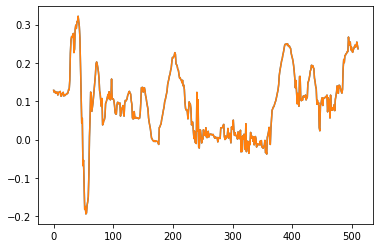

In [16]:
# ----------------------
# Lets run dat sh*t !
# ----------------------

columns = computeUsedColumns()
data = createDataset(columns, moveDetectionDuration = 333333)
plt.plot(data["s01/part1_layout_p02/20151105_192144_00"][0]["ThumbRightLocX"]) # smooth example before
#smoothDataset(data, windowLength = 13, order = 1)
plt.plot(data["s01/part1_layout_p02/20151105_192144_00"][0]["ThumbRightLocX"]) # smooth example after

In [17]:
#Create training and validation sets
xTrain, yTrain, xVal, yVal=createSets(data, 0.8, 50)
del data, columns

Creating training set with 40 files
1. Processing s01/part1_layout_p02/20151105_191251_00..
2. Processing s01/part1_layout_p02/20151105_192144_00..
3. Processing s01/part1_layout_p02/20151105_192312_00..
4. Processing s01/part1_layout_p02/20151105_192407_00..
5. Processing s01/part1_layout_p02/20151105_192610_00..
6. Processing s01/part1_layout_p02/20151105_192717_00..
7. Processing s01/part1_layout_p02/20151105_193157_00..
8. Processing s01/part2_layout_p01/20151105_194301_00..
9. Processing s01/part2_layout_p01/20151105_194456_00..
10. Processing s01/part2_layout_p01/20151105_194650_00..
11. Processing s01/part2_layout_p01/20151105_194955_00..
12. Processing s01/part2_layout_p01/20151105_195111_00..
13. Processing s01/part2_layout_p01/20151105_195450_00..
14. Processing s02/part1_layout_p04/20151106_214357_00..
15. Processing s02/part1_layout_p04/20151106_214521_00..
16. Processing s02/part1_layout_p04/20151106_214647_00..
17. Processing s02/part1_layout_p04/20151106_215028_00..
18. 

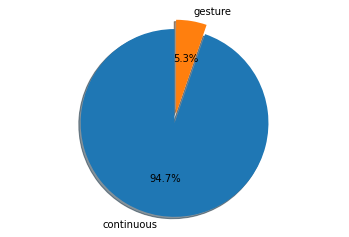

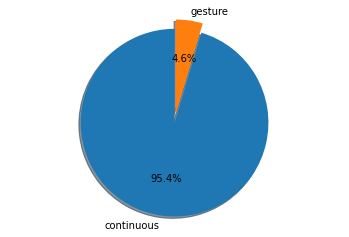

In [18]:
plotRatio(yTrain)
plotRatio(yVal)

In [19]:
xTrain, yTrain=equalizeSamples(xTrain, yTrain, 0.5)
#xVal, yVal=equalizeSamples(xVal, yVal, 0.5)

counting true labels
Found 4403 TRUE samples out of 83618 total samples
Equalizing samples
Samples equalized with 0.5 ratio


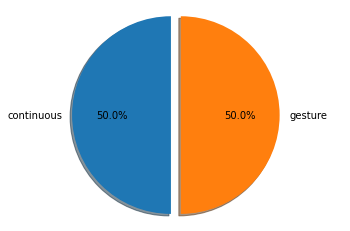

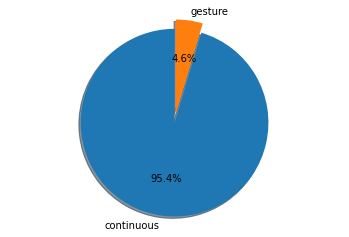

In [20]:
plotRatio(yTrain)
plotRatio(yVal)

In [21]:
model=createLSTM(100, 1)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [22]:
history=trainLSTM(model, 5, 64)

Train on 142587 samples, validate on 15843 samples
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/5
142587/142587 [==============================] - 22s 154us/sample - loss: 7.7050 - val_loss: 7.7801
Epoch 2/5
142587/142587 [==============================] - 22s 151us/sample - loss: 7.7050 - val_loss: 7.7801
Epoch 3/5
142587/142587 [==============================] - 22s 151us/sample - loss: 7.7050 - val_loss: 7.7801
Epoch 4/5
142587/142587 [==============================] - 22s 151us/sample - loss: 7.7050 - val_loss: 7.7801
Epoch 5/5
142587/142587 [==============================] - 22s 151us/sample - loss: 7.7050 - val_loss: 7.7801


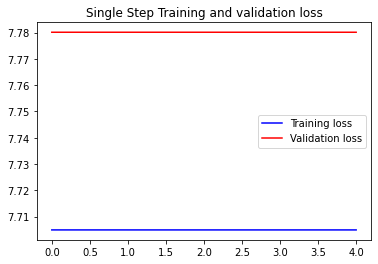

In [23]:
plot_train_history(history, 'Single Step Training and validation loss')

In [24]:
count=0
for i in range (len(yVal)):
    if (yVal[i]==1):
        count+=1
        
print(count)

1418


In [25]:
confusionMatrix(model, xVal, yVal)

ValueError: Error when checking model input: the list of Numpy arrays that you are passing to your model is not the size the model expected. Expected to see 1 array(s), but instead got the following list of 30744 arrays: [array([[ 0.00324407, -0.1549691 ,  2.12398   , ...,  0.08499116,
        -0.02624537,  1.91189   ],
       [ 0.00336724, -0.1549121 ,  2.124035  , ...,  0.08491641,
        -0.02446463,  1.914459  ],...

In [ ]:
acc=(25235+580)/len(xVal)

In [ ]:
389/(1029+389)

In [ ]:
(389+24800)/len(yVal)

In [ ]:
len(xVal)*4.6/100

In [ ]:
y_pred=model.predict_classes(xVal[:10000])

In [ ]:
plt.plot(y_pred[:10000])


In [ ]:
plt.plot(yVal[:10000])


In [ ]:
del y_pred

In [ ]:
trueLabelX=[]
trueLabelY=[]
for i in range (len(yVal)):
    if yVal[i]==1:
        trueLabelX.append(xVal[i])
        trueLabelY.append(yVal[i])

In [ ]:

for k in range(5):
    label1=[]
    for i in range (len(xVal[0])):
        label1.append(xVal[i][0][k])
    plt.figure(k)
    plt.plot(label1)

In [ ]:
test=np.array(xVal)

In [ ]:
test.shape

In [ ]:
noise = np.random.normal(0,1,100)